# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I Bornwise, Mahlaule, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [22]:
# Libraries for data loading, data manipulation and data visulisation
 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import xgboost as xgb
#import pygeohash as gh
#import lightgbm as lgbm
import matplotlib
# Libraries for data preparation and model building
 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import Lasso, Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.gridspec as gridspec
from  sklearn.model_selection  import  train_test_split
from  sklearn.ensemble  import  RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
import matplotlib.gridspec as gridspec
#import missingno as msno
import scipy.stats as stats 
from scipy.special import boxcox1p
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [23]:

df_train = pd.read_csv('df_train.csv')#Load train data set
df_test = pd.read_csv('df_test.csv')#Load test data set

In [24]:
df_train.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [25]:
df_test.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,...,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000
1,8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,...,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000
2,8765,2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,...,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000
3,8766,2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,...,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333
4,8767,2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,...,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000


In [26]:
df_train.shape

(8763, 49)

In [27]:
df_test.shape

(2920, 48)

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [28]:
# look at data statistics

In [29]:
# List columns not present in the test dataset
[name for name in df_train.columns if name not in df_test.columns]

['load_shortfall_3h']

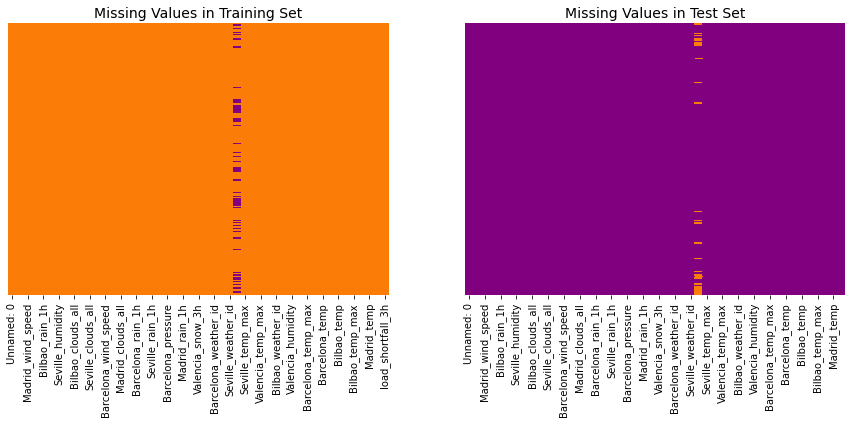

,% missing training set,% missing testing set
Valencia_pressure,23.6,15.55
Barcelona_pressure,0.0,0.00
Seville_weather_id,0.0,0.00
Madrid_wind_speed,0.0,0.00
Seville_clouds_all,0.0,0.00


In [30]:
# Check columns for missing values
fig,axis = plt.subplots(ncols=2, figsize=(15, 5))

#Training set
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap=['#fb7d07','purple'],ax=axis[0])
axis[0].set_title('Missing Values in Training Set',fontsize=14)
#Testing set
sns.heatmap(df_test.isnull(),yticklabels=False,cbar=False,cmap=['purple','#fb7d07'],ax=axis[1])
axis[1].set_title('Missing Values in Test Set',fontsize=14)

plt.show()

# Calculate percentage missing values
train = round((df_train.isnull().sum()/df_train.isnull().count())*100,2)
test = round((df_test.isnull().sum()/df_test.isnull().count())*100,2)
d = {'% missing training set': train, '% missing testing set': test}
pd.DataFrame(data=d).sort_values(by='% missing training set',ascending=False).head()

In [31]:
df_train.describe()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,4381.000000,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,...,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,2529.804538,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,...,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,...,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,2190.500000,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,...,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,4381.000000,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,...,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,6571.500000,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,...,296.816667,294.909000,289.816667,291.034167,292.966667,292.483333,297.150000,295.154667,293.884500,14498.166667
max,8762.000000,13.000000,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,359.333333,...,314.483333,307.316667,309.816667,310.710000,304.816667,317.966667,314.816667,313.133333,310.383333,31904.000000


In [32]:
df_train.skew()

Unnamed: 0               0.000000
Madrid_wind_speed        1.441144
Bilbao_rain_1h           5.222802
Valencia_wind_speed      3.499637
Seville_humidity        -0.310175
Madrid_humidity         -0.057378
Bilbao_clouds_all       -0.053085
Bilbao_wind_speed        1.716914
Seville_clouds_all       1.814452
Bilbao_wind_deg          0.226927
Barcelona_wind_speed     1.057331
Barcelona_wind_deg      -0.180001
Madrid_clouds_all        1.246745
Seville_wind_speed       1.151006
Barcelona_rain_1h        8.726988
Seville_rain_1h          8.067341
Bilbao_snow_3h          26.177568
Barcelona_pressure      57.979664
Seville_rain_3h         19.342574
Madrid_rain_1h           7.074308
Barcelona_rain_3h       12.696605
Valencia_snow_3h        63.298084
Madrid_weather_id       -3.107722
Barcelona_weather_id    -2.584011
Bilbao_pressure         -0.999642
Seville_weather_id      -3.275574
Valencia_pressure       -1.705162
Seville_temp_max        -0.033931
Madrid_pressure         -1.850768
Valencia_temp_

In [33]:
Categorical_Train = df_train.select_dtypes(include = ['object']) # selects all categorical variables from the train data set
Categorical_Test = df_test.select_dtypes(include = ['object']) # selects all categorical variables from the test data set
Categorical_Train.head()

,time,Valencia_wind_deg,Seville_pressure
0,2015-01-01 03:00:00,level_5,sp25
1,2015-01-01 06:00:00,level_10,sp25
2,2015-01-01 09:00:00,level_9,sp25
3,2015-01-01 12:00:00,level_8,sp25
4,2015-01-01 15:00:00,level_7,sp25


In [34]:
le = LabelEncoder()
encoded_categorical_Train = Categorical_Train.apply(lambda x: le.fit_transform(x))
encoded_categorical_Test = Categorical_Test.apply(lambda x: le.fit_transform(x))
encoded_categorical_Train.head()

,time,Valencia_wind_deg,Seville_pressure
0,0,5,17
1,1,1,17
2,2,9,17
3,3,8,17
4,4,7,17


In [35]:
Numeric_Train = df_train._get_numeric_data()# selects all numerical columns from the train data frame
Numeric_Test = df_test._get_numeric_data()# selects all numerical columns from the test data frame
Numeric_Train.head()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,0.666667,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,0.333333,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,1.000000,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,1.000000,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,1.000000,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [36]:
train_encoded = pd.concat([encoded_categorical_Train, Numeric_Train], axis = 1) #combining the numerical data with the encoded categorical data
test_encoded = pd.concat([encoded_categorical_Test, Numeric_Test], axis = 1) #combining the numerical data with the encoded categorical data

In [37]:
train_encoded.head()

,time,Valencia_wind_deg,Seville_pressure,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,5,17,0,0.666667,0.0,0.666667,74.333333,64.000000,0.0,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,1,17,1,0.333333,0.0,1.666667,78.333333,64.666667,0.0,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,9,17,2,1.000000,0.0,1.000000,71.333333,64.333333,0.0,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,8,17,3,1.000000,0.0,1.000000,65.333333,56.333333,0.0,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,7,17,4,1.000000,0.0,1.000000,59.000000,57.000000,2.0,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [38]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            2920 non-null   int64  
 1   time                  2920 non-null   object 
 2   Madrid_wind_speed     2920 non-null   float64
 3   Valencia_wind_deg     2920 non-null   object 
 4   Bilbao_rain_1h        2920 non-null   float64
 5   Valencia_wind_speed   2920 non-null   float64
 6   Seville_humidity      2920 non-null   float64
 7   Madrid_humidity       2920 non-null   float64
 8   Bilbao_clouds_all     2920 non-null   float64
 9   Bilbao_wind_speed     2920 non-null   float64
 10  Seville_clouds_all    2920 non-null   float64
 11  Bilbao_wind_deg       2920 non-null   float64
 12  Barcelona_wind_speed  2920 non-null   float64
 13  Barcelona_wind_deg    2920 non-null   float64
 14  Madrid_clouds_all     2920 non-null   float64
 15  Seville_wind_speed   

In [39]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

In [40]:
df_train.isnull().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

In [41]:
df_test.isnull().sum()

Unnamed: 0                0
time                      0
Madrid_wind_speed         0
Valencia_wind_deg         0
Bilbao_rain_1h            0
Valencia_wind_speed       0
Seville_humidity          0
Madrid_humidity           0
Bilbao_clouds_all         0
Bilbao_wind_speed         0
Seville_clouds_all        0
Bilbao_wind_deg           0
Barcelona_wind_speed      0
Barcelona_wind_deg        0
Madrid_clouds_all         0
Seville_wind_speed        0
Barcelona_rain_1h         0
Seville_pressure          0
Seville_rain_1h           0
Bilbao_snow_3h            0
Barcelona_pressure        0
Seville_rain_3h           0
Madrid_rain_1h            0
Barcelona_rain_3h         0
Valencia_snow_3h          0
Madrid_weather_id         0
Barcelona_weather_id      0
Bilbao_pressure           0
Seville_weather_id        0
Valencia_pressure       454
Seville_temp_max          0
Madrid_pressure           0
Valencia_temp_max         0
Valencia_temp             0
Bilbao_weather_id         0
Seville_temp        

In [42]:
# evaluate correlation

In [43]:
# have a look at feature distributions

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

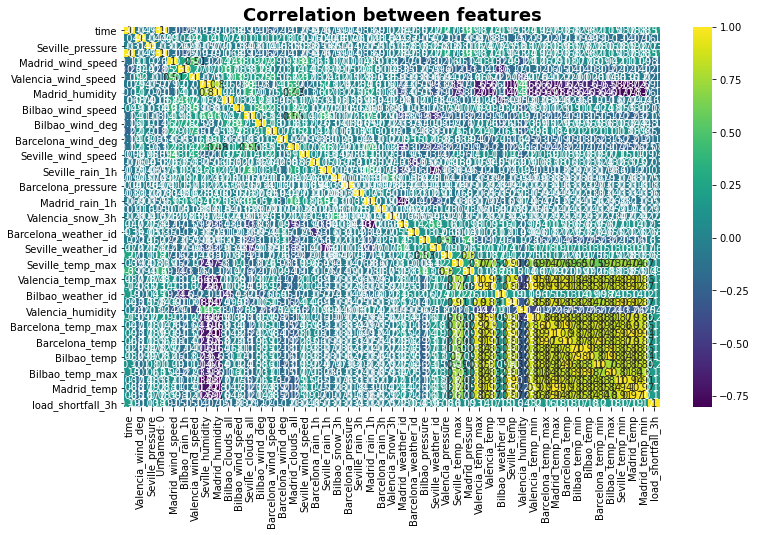

In [44]:
train_corr=train_encoded.corr()
f,ax=plt.subplots(figsize=(12,7))
sns.heatmap(train_corr,cmap='viridis',annot=True)
plt.title("Correlation between features",weight='bold',fontsize=18)
plt.show()

#plotting the heatmap for different features

In [45]:
train_encoded.drop(['Madrid_temp','Bilbao_temp_max','Bilbao_temp','Barcelona_temp'], axis = 1)

,time,Valencia_wind_deg,Seville_pressure,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,...,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Bilbao_temp_min,Barcelona_temp_min,Seville_temp_min,Madrid_temp_min,load_shortfall_3h
0,0,5,17,0,0.666667,0.0,0.666667,74.333333,64.000000,0.000000,...,274.254667,75.666667,269.888000,281.013000,265.938000,269.338615,281.013000,274.254667,265.938000,6715.666667
1,1,1,17,1,0.333333,0.0,1.666667,78.333333,64.666667,0.000000,...,274.945000,71.000000,271.728333,280.561667,266.386667,270.376000,280.561667,274.945000,266.386667,4171.666667
2,2,9,17,2,1.000000,0.0,1.000000,71.333333,64.333333,0.000000,...,278.792000,65.666667,278.008667,281.583667,272.708667,275.027229,281.583667,278.792000,272.708667,4274.666667
3,3,8,17,3,1.000000,0.0,1.000000,65.333333,56.333333,0.000000,...,285.394000,54.000000,284.899552,283.434104,281.895219,281.135063,283.434104,285.394000,281.895219,5075.666667
4,4,7,17,4,1.000000,0.0,1.000000,59.000000,57.000000,2.000000,...,285.513719,58.333333,283.015115,284.213167,280.678437,282.252063,284.213167,285.513719,280.678437,6620.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,8758,6,15,8758,1.000000,0.0,2.666667,89.000000,95.666667,56.666667,...,285.076667,71.333333,282.483333,282.150000,280.816667,285.150000,280.483333,284.816667,278.483333,-28.333333
8759,8759,6,15,8759,5.000000,0.0,2.000000,82.000000,85.000000,26.666667,...,287.673333,40.333333,291.816667,287.816667,283.483333,286.483333,287.150000,287.150000,280.150000,2266.666667
8760,8760,9,14,8760,6.333333,0.4,7.333333,67.666667,71.000000,63.333333,...,290.070000,44.666667,290.706333,290.483333,285.150000,283.816667,289.150000,289.150000,281.150000,822.000000
8761,8761,8,15,8761,7.333333,0.2,7.333333,67.666667,79.000000,63.333333,...,290.070000,45.000000,290.483333,288.150000,283.483333,278.816667,286.816667,289.150000,280.816667,-760.000000


In [46]:
train_encoded.replace([np.inf, -np.inf], np.nan, inplace=True)

In [47]:
train_encoded.fillna(999, inplace=True)

In [48]:
y = train_encoded['load_shortfall_3h']
X = train_encoded.drop(['load_shortfall_3h'], axis = 1)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6134, 48)
(6134,)
(2629, 48)
(2629,)


In [50]:
# remove missing values/ features

In [51]:
# create new features

In [52]:
# engineer existing features

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [53]:
df_train = pd.get_dummies(data = train, columns = ['Valencia_wind_deg', 'time', 'Seville_pressure'], drop_first = True)
df_train.head()

,23.6
Unnamed: 0,0
time,0
Madrid_wind_speed,0
Valencia_wind_deg,0
Bilbao_rain_1h,0


In [54]:
## Create an empty list
pipeline_models = []

# Assign all models into the list
seed = 42
models = [Ridge(tol=10,random_state=seed),
          Lasso(tol=1,random_state=seed),
          RandomForestRegressor(random_state=seed),
          ExtraTreesRegressor(random_state=seed),
          GradientBoostingRegressor(),
          DecisionTreeRegressor(),
          KNeighborsRegressor()]

model_names = ["Ridge","Lasso","RFR","ETR","GBoost_Reg","DT_Reg","KNN_Reg"]

## Assign each model to a pipeline
for name, model in zip(model_names,models):
    pipeline = ("Scaled_"+ name,
                Pipeline([("Scaler",StandardScaler()),
                          (name,model)
                         ]))
    pipeline_models.append(pipeline)

In [55]:
## Create a dataframe to store all the models' cross validation score
evaluate = pd.DataFrame(columns=["model","cv","std"])


## Encoded dataset
for name,model in pipeline_models:
    kfold = KFold(n_splits=7,shuffle=True,random_state=42)
    cv = cross_val_score(model, X_train, y_train, cv=kfold, n_jobs=-1, scoring="r2")
    
    row = evaluate.shape[0]
    evaluate.loc[row,"model"] = name
    evaluate.loc[row,"cv"] = round(cv.mean(),3)
    evaluate.loc[row,"std"] = "+/- {}".format(round(cv.std(),4))
    
    evaluate = evaluate.sort_values("cv",ascending=False)

[Text(0, 0, 'Scaled_RFR'),
 Text(1, 0, 'Scaled_ETR'),
 Text(2, 0, 'Scaled_GBoost_Reg'),
 Text(3, 0, 'Scaled_KNN_Reg'),
 Text(4, 0, 'Scaled_Ridge'),
 Text(5, 0, 'Scaled_Lasso'),
 Text(6, 0, 'Scaled_DT_Reg')]

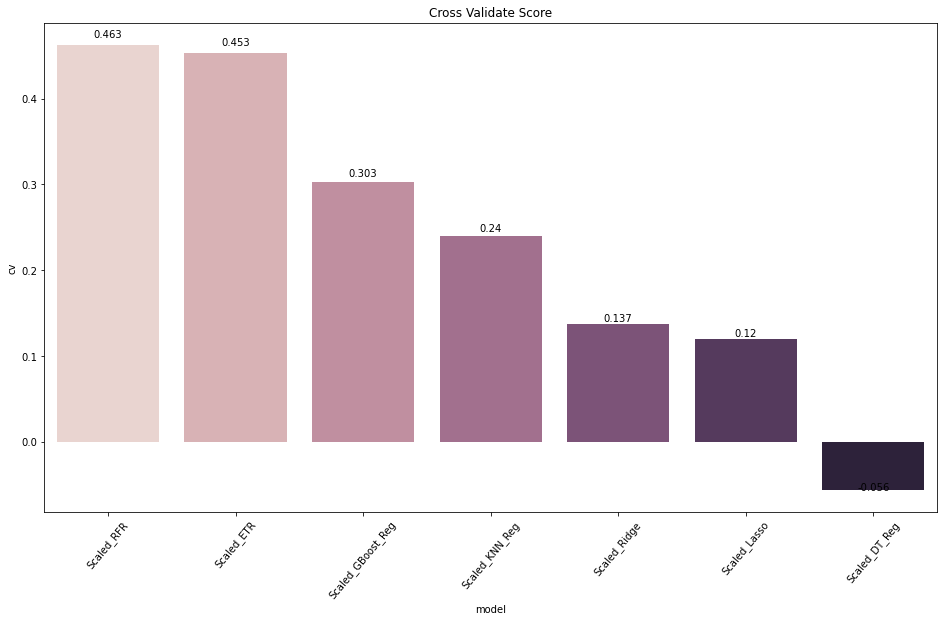

In [56]:
## Visualization
fig, ax = plt.subplots(1,1,sharey=False,figsize=(16,9))

## Encoded dataset
bar = sns.barplot(evaluate["model"], evaluate["cv"],ax=ax,palette = sns.cubehelix_palette(evaluate.shape[0]))
for rec in bar.patches:
    height = rec.get_height()
    ax.text(rec.get_x() + rec.get_width()/2, height*1.02,height,ha="center")
ax.set_title("Cross Validate Score")
ax.set_xticklabels(evaluate["model"].to_list(),rotation =50)

In [57]:
 from sklearn.ensemble import RandomForestRegressor

In [58]:
final_model =RandomForestRegressor()
final_model = final_model.fit(X_train,y_train)

In [59]:
y_pred = final_model.predict(test_encoded)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
df_Train['load_shortfall_3h'] = y_pred 

In [ ]:
sub = df_test[['load_shortfall_3h']]

In [ ]:
sub.head()

In [ ]:
sub.to_csv('RandomForestRegressor.csv',index =False)

In [ ]:
# create targets and features dataset

In [ ]:
# create one or more ML models

In [ ]:
# evaluate one or more ML models

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic